In [1]:
# Code based on https://github.com/alexander-held/PyHEP-2021-cabinetry/blob/main/talk.ipynb
import cabinetry
cabinetry.set_logging()

In [2]:
# Make sure we have all the data files

import os
import requests

# If any of the necessary folders don't exist, make them
if not os.path.isdir('4lep'):
    os.mkdir('4lep')
if not os.path.isdir('4lep/Data'):
    os.mkdir('4lep/Data')
if not os.path.isdir('4lep/MC'):
    os.mkdir('4lep/MC')
    
# List of all of the files we need
filelist = ['4lep/Data/data_A.4lep.root',
            '4lep/Data/data_B.4lep.root',
            '4lep/Data/data_C.4lep.root',
            '4lep/Data/data_D.4lep.root',
            '4lep/MC/mc_361106.Zee.4lep.root',
            '4lep/MC/mc_361107.Zmumu.4lep.root',
            '4lep/MC/mc_410000.ttbar_lep.4lep.root',
            '4lep/MC/mc_363490.llll.4lep.root',
            '4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root',
            '4lep/MC/mc_344235.VBFH125_ZZ4lep.4lep.root',
            '4lep/MC/mc_341964.WH125_ZZ4lep.4lep.root',
            '4lep/MC/mc_341947.ZH125_ZZ4lep.4lep.root']

# For each of these files
for filepath in filelist:

    # Check if the file exists locally
    if not os.path.isfile(filepath):

        #If the file doesn't exist, download it
        data_download = requests.get('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/' + filepath)
        new_file = open(filepath, 'wb')
        new_file.write(data_download.content)
        new_file.close()

In [3]:
config = {
   "General":{
      "Measurement": "CabinetryHZZAnalysis",
      "POI": "Signal_norm",
      "InputPath": "4lep/{SamplePaths}",
      "HistogramFolder": "histograms/"
   }
}

In [4]:
bin_list = list(range(80, 255, 5))

In [5]:
config.update({
   "Regions":[
      {
         "Name": "Signal_region",
         "Filter": "(lep_charge[:,0] + lep_charge[:,1] + lep_charge[:,2] + lep_charge[:,3] == 0) & ((lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3] == 44) | (lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3] == 48) | (lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3] == 52))",
         "Variable": "sqrt((lep_E[:,0] + lep_E[:,1] + lep_E[:,2] + lep_E[:,3])**2 - (lep_pt[:,0]*cos(lep_phi[:,0]) + lep_pt[:,1]*cos(lep_phi[:,1]) + lep_pt[:,2]*cos(lep_phi[:,2]) + lep_pt[:,3]*cos(lep_phi[:,3]))**2 - (lep_pt[:,0]*sin(lep_phi[:,0]) + lep_pt[:,1]*sin(lep_phi[:,1]) + lep_pt[:,2]*sin(lep_phi[:,2]) + lep_pt[:,3]*sin(lep_phi[:,3]))**2 - (lep_pt[:,0]*sinh(lep_eta[:,0]) + lep_pt[:,1]*sinh(lep_eta[:,1]) + lep_pt[:,2]*sinh(lep_eta[:,2]) + lep_pt[:,3]*sinh(lep_eta[:,3]))**2)/1000",
         "Binning": bin_list
      }
   ]
})

In [6]:
config.update({
   "Samples":[
      {
         "Name": "Data",
         "Tree": "mini",
         "SamplePaths": ["Data/data_A.4lep.root",
                         "Data/data_B.4lep.root",
                         "Data/data_C.4lep.root",
                         "Data/data_D.4lep.root"],
         "Data": True
      },
      {
         "Name": "Signal",
         "Tree": "mini",
         "SamplePaths": ['MC/mc_345060.ggH125_ZZ4lep.4lep.root',
                         'MC/mc_344235.VBFH125_ZZ4lep.4lep.root',
                         'MC/mc_341964.WH125_ZZ4lep.4lep.root',
                         'MC/mc_341947.ZH125_ZZ4lep.4lep.root'],
         "Weight": "((channelNumber == 345060)*2.1605e-6 + (channelNumber == 344235)*1.2588e-6 + (channelNumber == 341964)*2.5228e-5 + (channelNumber == 341947)*1.4283e-7)*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER"
      },
      {
         "Name": "Background $ZZ^{star}$",
         "Tree": "mini",
         "SamplePaths": "MC/mc_363490.llll.4lep.root",
         "Weight": "0.0016685*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER"
      },
      {
         "Name": "Background $Z,tt^{bar}$",
         "Tree": "mini",
         "SamplePaths": ['MC/mc_361106.Zee.4lep.root',
                         'MC/mc_361107.Zmumu.4lep.root',
                         'MC/mc_410000.ttbar_lep.4lep.root'],
         "Weight": "((channelNumber == 361106)*1.2980e-4 + (channelNumber == 361107)*1.3239e-4 + (channelNumber == 410000)*0.091663)*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER"
      }
   ]
})

In [7]:
config.update({"Systematics": []})

In [8]:
config.update({
   "NormFactors":[
      {
         "Name": "Signal_norm",
         "Samples": "Signal",
         "Nominal": 1,
         "Bounds": [0, 10]
      },
      {
         "Name": "ZZ_norm",
         "Samples": "Background $ZZ^{star}$",
         "Nominal": 1,
         "Bounds": [0, 10]
      },
      {
         "Name": "Ztt_norm",
         "Samples": "Background $Z,tt^{bar}$",
         "Nominal": 1,
         "Bounds": [0, 10]
      }
   ]
})

In [9]:
import time

start_time = time.time()
cabinetry.template_builder.create_histograms(config, method="uproot")
# cabinetry.template_builder.create_histograms(config, method="coffea")
# Using the coffea backend requires this branch of cabinetry: https://github.com/alexander-held/cabinetry/pull/216
# It also further requires the modified coffea_wrapper.py found at https://github.com/stormsomething/CoffeaHZZAnalysis
finish_time = time.time()

print("Total runtime in seconds: " + str(finish_time - start_time))

DEBUG - cabinetry.route -   in region Signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Data.npz
DEBUG - cabinetry.route -     reading sample Signal
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal.npz
DEBUG - cabinetry.route -     reading sample Background $ZZ^{star}$
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Background-$ZZ^{star}$.npz
DEBUG - cabinetry.route -     reading sample Background $Z,tt^{bar}$
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Background-$Z,tt^{bar}$.npz


Total runtime in seconds: 4.770625114440918


In [10]:
plot_config = {
   "Regions":[
      {
         "Name": "Signal_region",
         "Variable": "4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]",
         "Binning": bin_list
      }
   ]
}

INFO - cabinetry.workspace - building workspace
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Signal_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding NormFactor Signal_norm to sample Signal in region Signal_region
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Background-$ZZ^{star}$_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding NormFactor ZZ_norm to sample Background $ZZ^{star}$ in region Signal_region
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Background-$Z,tt^{bar}$_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding NormFactor Ztt_norm to sample Background $Z,tt^{bar}$ in region Signal_region
WARNING - cabinetry.histo - the modified his

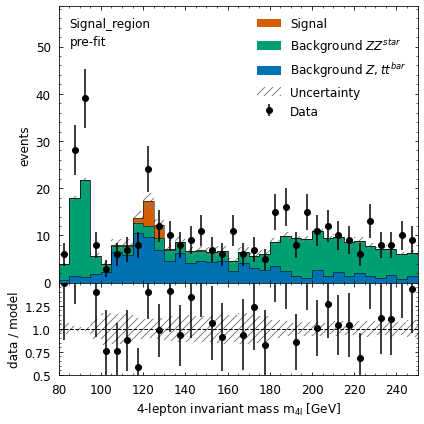

In [11]:
ws = cabinetry.workspace.build(config)
model, data = cabinetry.model_utils.model_and_data(ws)
model_prediction = cabinetry.model_utils.prediction(model)
cabinetry.tabulate.yields(model_prediction, data, per_bin=False, per_channel=True)
_ = cabinetry.visualize.data_mc(model_prediction, data, config=plot_config)

In [12]:
fit_results = cabinetry.fit.fit(model, data)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - MINUIT status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 68.27                      │             Nfcn = 2230              │
│ EDM = 4e-05 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

DEBUG - cabinetry.model_utils - total stdev is [... 1.14, 1.36, 1.31, 1.17, 1.23, 1.1, 1.2, 1.08, 0.967, 1.04, 0.849, 0.914]]
DEBUG - cabinetry.model_utils - total stdev per channel is [19.2]
DEBUG - cabinetry.visualize.utils - saving figure as figures/Signal_region_postfit.pdf


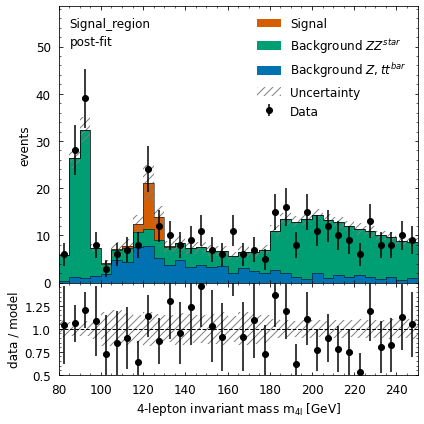

In [13]:
model_prediction_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
_ = cabinetry.visualize.data_mc(model_prediction_postfit, data, config=plot_config)

In [14]:
significance_results = cabinetry.fit.significance(model, data)

INFO - cabinetry.fit - calculating discovery significance
INFO - cabinetry.fit - observed p-value: 0.950%
INFO - cabinetry.fit - observed significance: 2.345
INFO - cabinetry.fit - expected p-value: 9.661%
INFO - cabinetry.fit - expected significance: 1.301
